# E3 - ARIMA

Elaborado por GRUPO 1:
- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [1]:
# Librerias y funciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

## 3.1. Análisis AFC y PAFC de 4 Series

In [2]:
series = pd.read_csv('DataSet/data_arma.csv', header=0, index_col=0)
series.describe()

,ts1,ts2,ts3,ts4
count,500.000000,500.000000,500.000000,500.000000
mean,-0.009962,0.104446,-0.031936,-0.013467
std,1.095166,2.242134,1.884763,1.013414
min,-3.577476,-6.880294,-5.760386,-3.022557
25%,-0.745666,-1.498428,-1.333192,-0.723487
50%,-0.041335,0.083156,0.135272,0.012143
75%,0.720957,1.835505,1.271606,0.693693
max,3.492215,6.297951,5.604490,2.960854


In [3]:
warnings.filterwarnings('ignore')

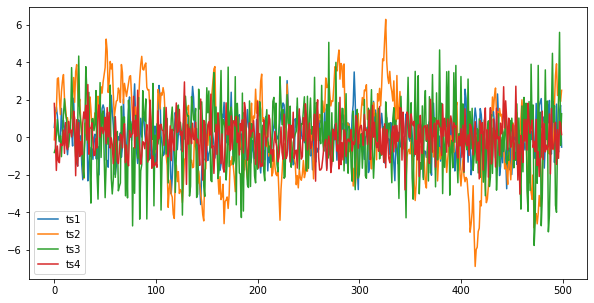

In [4]:
series.plot(figsize=(10, 5))

## TS1

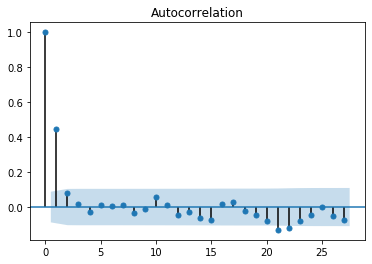

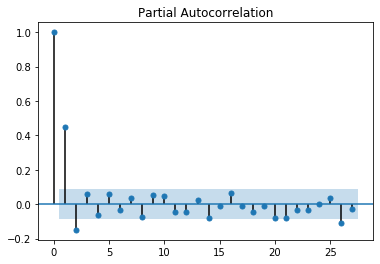

In [5]:
#ACF y PACF serie ts1
plot_acf(series.ts1);
plot_pacf(series.ts1);

* Análisis ts1

La serie de datos ts1 de acuerdo con el autocorrelation plot sugiere una Media Móvil que presentan un cambio abrupto después de la segunda observación, q=2. Por su parte el PACF sugiere un Autorregresivo de orden 3 (p=3). En total la serie sigue un proceso ARIMA (3,0,2)

## TS2

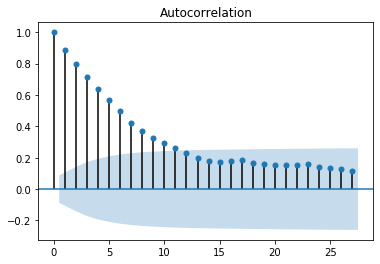

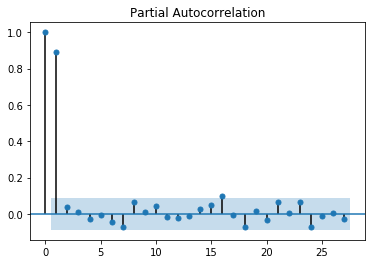

In [6]:
#ACF y PACF serie ts2
plot_acf(series.ts2);
plot_pacf(series.ts2);

* Análisis ts2

De acuerdo con el autocorrelation plot de la ts2 se puede evidenciar que la serie de de datos es Autorregresiva, acorde con esto se presenta en el partial correlation plot que es de grado 2. En total la serie sigue un proceso ARIMA (2,0,0)

## TS3

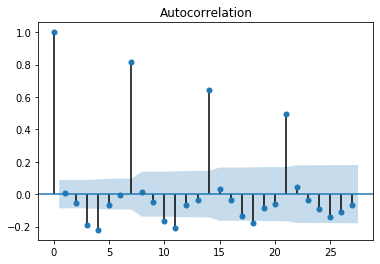

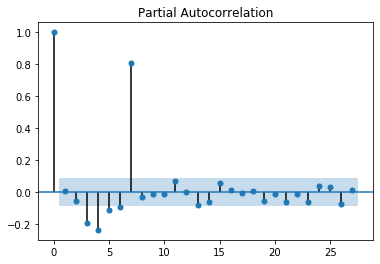

In [7]:
#ACF y PACF serie ts3
plot_acf(series.ts3);
plot_pacf(series.ts3);

* Análisis ts3

La serie de datos sugiere una integración de orden 8 (d=8), Dado que tanto la función de autocorrelación total como la parcial, cada 8 periodos tienne rezagos significativos. Adicionalmente, de acuerdo con la función de autocorrelación parcial, se puede sugerir un AR de orden 2 (p=2) dada la tendencia decreciente en los rezagos de la función de autocorrelación total. En total la serie sigue un proceso ARIMA (2,8,0)

## TS4

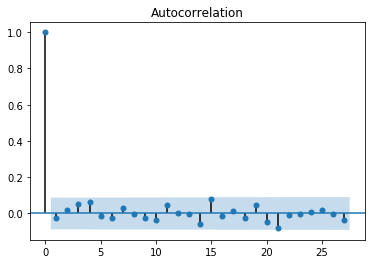

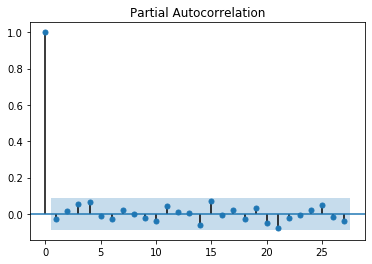

In [8]:
#ACF y PACF serie ts4
plot_acf(series.ts4);
plot_pacf(series.ts4);

* Análisis ts4

Se observan dos componentes en la serie de tiempo 4 que se ven así: el Autocorrelation plot  sugiere una Media Móvil de orden 1 y  por su parte el PACF sugiere un AR de orden 1. En total la serie sigue un proceso ARIMA (1,0,1).


## 3.2. Análisis serie "Ventas de Shampoo"

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


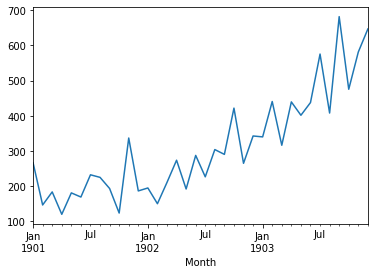

In [9]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
shampoo = pd.read_csv('DataSet/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(shampoo.head())
shampoo.plot(figsize=(6, 4));

In [10]:
print(shampoo.describe())

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64


La serie muestra una tendencia creciente, lo que sugiere que se debe hacer una diferenciación para volverla estacionaria

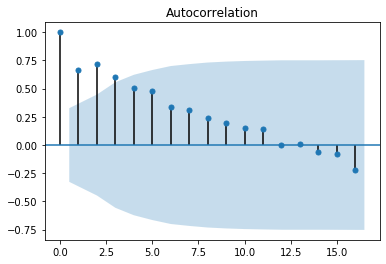

In [11]:
#Función de Autocorrelación
plot_acf(shampoo);

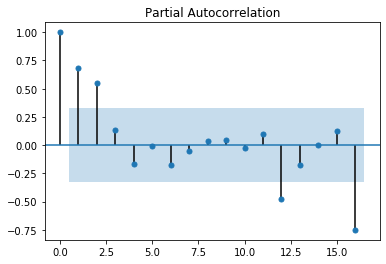

In [12]:
#Función de Autocorrelación Parcial
plot_pacf(shampoo);

Las gráficas ACF y PACF sugieren un proceso ARIMA (3,1,0), la serie además sugiere una posible estacionalidad. Sin embargo, dada la cantidad limitada de datos no se puede concluir al respecto.

In [13]:
#Bases de train y test
X = shampoo.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

### a. Modelo ARIMA(3,1,0)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   22
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -121.992
Method:                       css-mle   S.D. of innovations             59.934
Date:                Sat, 10 Jul 2021   AIC                            253.983
Time:                        20:16:29   BIC                            259.439
Sample:                             1   HQIC                           255.269
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8087      4.738      1.437      0.151      -2.477      16.094
ar.L1.D.y     -0.9051      0.205     -4.414      0.000      -1.307      -0.503
ar.L2.D.y     -0.5221      0.269     -1.942      0.0

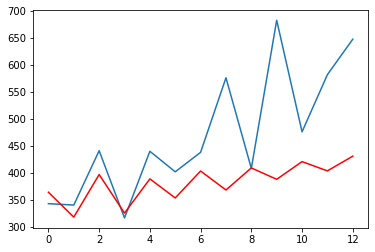

In [14]:
# fit model
model1 = ARIMA(history, order=(3,1,0))
model1_fit = model1.fit(disp=0)
print(model1_fit.summary())

output = model1_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

#print(pd.DataFrame({'predict':predictions, 'real':real_values}))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


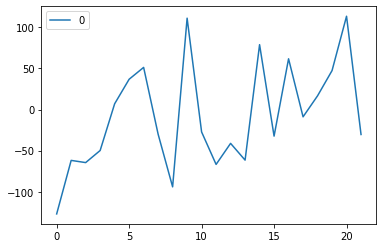

In [15]:
# plot residual errors
residuals = pd.DataFrame(model1_fit.resid)
residuals.plot()
plt.show()

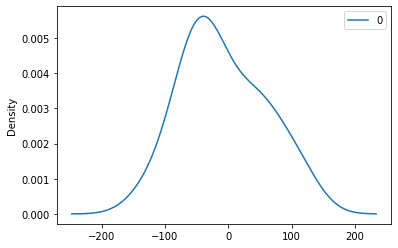

                0
count   22.000000
mean    -7.795182
std     65.262524
min   -126.908675
25%    -58.585341
50%    -28.634473
75%     44.689313
max    113.385796


In [16]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [17]:
# MSE
mse1 = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse1)

Test MSE: 16994.747


### b. Modelo ARIMA(3,1,1)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   22
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -121.517
Method:                       css-mle   S.D. of innovations             58.322
Date:                Sat, 10 Jul 2021   AIC                            255.033
Time:                        20:16:29   BIC                            261.580
Sample:                             1   HQIC                           256.576
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0137      3.399      2.063      0.039       0.352      13.676
ar.L1.D.y     -0.5688      0.399     -1.426      0.154      -1.351       0.213
ar.L2.D.y     -0.2719      0.391     -0.696      0.4

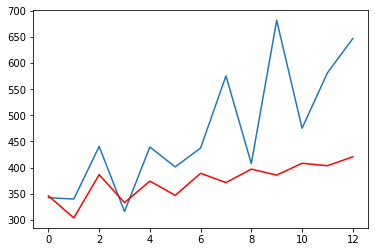

In [18]:
# fit model
model2 = ARIMA(history, order=(3,1,1))
model2_fit = model2.fit(disp=0)
print(model2_fit.summary())

output = model2_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

#print(pd.DataFrame({'predict':predictions, 'real':real_values}))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


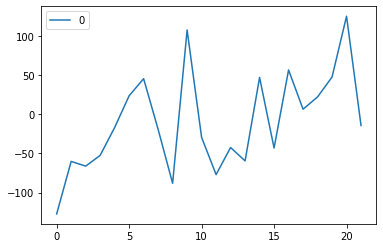

In [19]:
# plot residual errors
residuals = pd.DataFrame(model2_fit.resid)
residuals.plot()
plt.show()

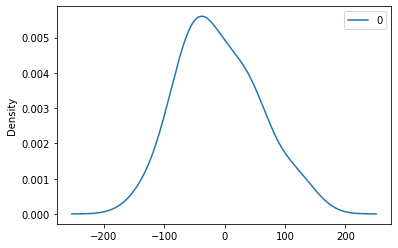

                0
count   22.000000
mean    -9.825613
std     63.733733
min   -127.113725
25%    -57.754736
50%    -18.148575
75%     39.857517
max    124.892953


In [20]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [21]:
# MSE
mse2 = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse2)

Test MSE: 17779.513


### c. Modelo ARIMA(3,1,2)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   22
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -119.530
Method:                       css-mle   S.D. of innovations             47.916
Date:                Sat, 10 Jul 2021   AIC                            253.059
Time:                        20:16:30   BIC                            260.696
Sample:                             1   HQIC                           254.858
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3326      4.404      1.665      0.096      -1.299      15.964
ar.L1.D.y     -0.2412      0.178     -1.354      0.176      -0.590       0.108
ar.L2.D.y     -0.4758      0.140     -3.394      0.0

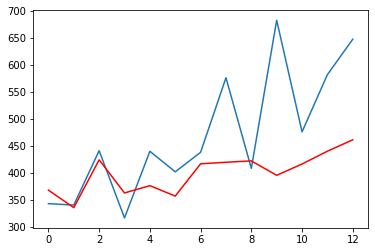

In [22]:
# fit model
model3 = ARIMA(history, order=(3,1,2))
model3_fit = model3.fit(disp=0)
print(model3_fit.summary())

output = model3_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

#print(pd.DataFrame({'predict':predictions, 'real':real_values}))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

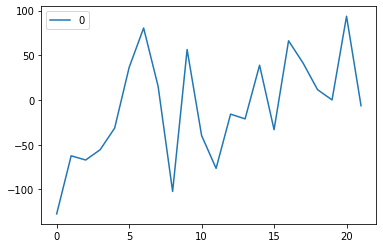

In [23]:
# plot residual errors
residuals = pd.DataFrame(model3_fit.resid)
residuals.plot()
plt.show()

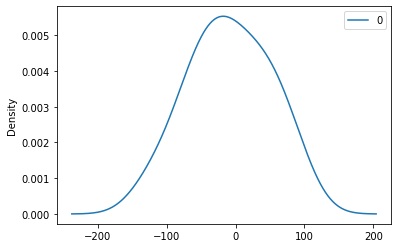

                0
count   22.000000
mean    -9.020196
std     59.535084
min   -127.432594
25%    -51.629498
50%    -11.100151
75%     38.295526
max     93.716281


In [24]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [25]:
# MSE
mse3 = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse3)

Test MSE: 13474.297


### d. Modelo ARIMA(3,1,3)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   22
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -119.450
Method:                       css-mle   S.D. of innovations             47.772
Date:                Sat, 10 Jul 2021   AIC                            254.899
Time:                        20:16:30   BIC                            263.628
Sample:                             1   HQIC                           256.956
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4366      3.922      1.896      0.058      -0.250      15.124
ar.L1.D.y     -0.1547      0.277     -0.558      0.577      -0.698       0.389
ar.L2.D.y     -0.5236      0.172     -3.038      0.0

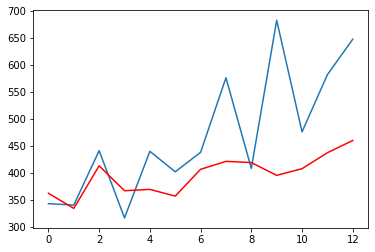

In [26]:
# fit model
model4 = ARIMA(history, order=(3,1,3))
model4_fit = model4.fit(disp=0)
print(model4_fit.summary())

output = model4_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

#print(pd.DataFrame({'predict':predictions, 'real':real_values}))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

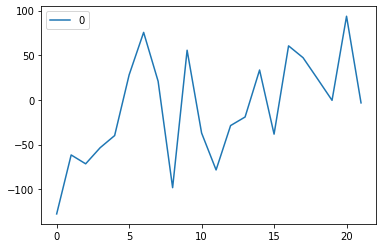

In [27]:
# plot residual errors
residuals = pd.DataFrame(model4_fit.resid)
residuals.plot()
plt.show()

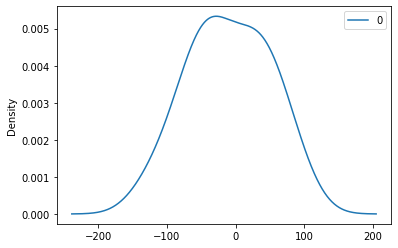

                0
count   22.000000
mean    -9.898092
std     59.226599
min   -127.536638
25%    -50.043759
50%    -11.158627
75%     32.162179
max     93.718109


In [28]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [29]:
# MSE
mse4 = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse4)

Test MSE: 13776.452


In [30]:
### e. Modelo ARIMA(2,1,2)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   22
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -121.639
Method:                       css-mle   S.D. of innovations             56.367
Date:                Sat, 10 Jul 2021   AIC                            255.278
Time:                        20:16:31   BIC                            261.824
Sample:                             1   HQIC                           256.820
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3777      1.771      3.601      0.000       2.907       9.849
ar.L1.D.y     -0.7026      0.442     -1.588      0.112      -1.570       0.164
ar.L2.D.y      0.1241      0.294      0.422      0.6

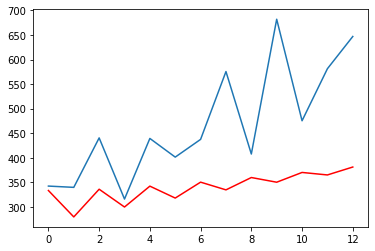

In [31]:
# fit model
model5 = ARIMA(history, order=(2,1,2))
model5_fit = model5.fit(disp=0)
print(model5_fit.summary())

output = model5_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

#print(pd.DataFrame({'predict':predictions, 'real':real_values}))

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

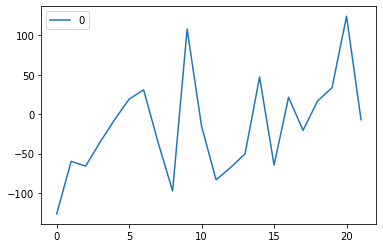

In [32]:
# plot residual errors
residuals = pd.DataFrame(model5_fit.resid)
residuals.plot()
plt.show()

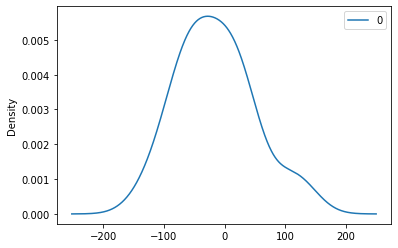

                0
count   22.000000
mean   -15.217776
std     62.589545
min   -126.477656
25%    -63.365043
50%    -17.941592
75%     20.914223
max    124.273822


In [33]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [34]:
# MSE
mse5 = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % mse5)

Test MSE: 25986.370


In [35]:
# Comparación de MSE
from tabulate import tabulate
table = [['Modelo', 'MSE'],['ARIMA (2,1,2)', mse5],['ARIMA (3,1,1)', mse2], ['ARIMA (3,1,0)', mse1],['ARIMA (3,1,3)', mse4],['ARIMA (3,1,2)', mse3]]
print(tabulate(table))

-------------  ------------------
Modelo         MSE
ARIMA (2,1,2)  25986.370463999887
ARIMA (3,1,1)  17779.51265171074
ARIMA (3,1,0)  16994.747115129765
ARIMA (3,1,3)  13776.451814434831
ARIMA (3,1,2)  13474.296542665055
-------------  ------------------


# Conclusión

De acuerdo con el MSE de los diferentes modelos, el que mejor se ajusta el ARIMA de parámetros (3,1,2) con un MSE de 13474.3